In [5]:
from keras import applications
from keras.applications import VGG16


In [11]:
# dir(applications)
vgg = VGG16(
    include_top=False,
    classes=1000,
    input_shape=(150, 150, 3),
    classifier_activation='softmax'
)

58889256/58889256 [==============================] - 3s 0us/step


In [12]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [76]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical, pad_sequences
from keras.layers import BatchNormalization, Dropout

from glob import glob


base_dir = './kagglecatsanddogs_5340/PetImages'
file_list_dog = glob(base_dir+'/Dog/*.jpg')[:1000]
file_list_cat = glob(base_dir+'/Cat/*.jpg')[:1000]

In [77]:
# 1000개
file_list = np.concatenate([file_list_dog, file_list_cat], axis=0)
X = np.zeros((len(file_list),150,150,3))
y = []

# 방법 2: data가 없는 파일 제거함.
#         --> 제거 후에 나머지 이미지 파일은 channel 통일시킴
for i, file in enumerate(file_list):
    t = plt.imread(file)
    f = cv.cvtColor(t, cv.COLOR_BGR2RGB)
    f = cv.resize(f, (150,150))
    if 'Cat' in file:
        y.append(0)
    else:
        y.append(1)

    X[i] = f

y = np.array(y)

index = np.random.choice(np.arange(len(X)), len(X), replace=False)
tr_ind = index[:int(index.size*0.8)]
te_idd = index[int(index.size*0.8):]

X_train = X[tr_ind]
y_train = y[tr_ind]

X_test = X[te_idd]
y_test = y[te_idd]

In [78]:
pre_trained_X = vgg.predict(X_train)

# opt = 'adam'
# loss = 'binary_crossentropy'
# metrics = ['accuracy']
# vgg.compile(optimizer=opt,
#               loss=loss,
#               metrics=metrics)

# vgg.fit(X_train, y_train, epochs=10, batch_size=100)

50/50 [==============================] - 52s 1s/step


In [79]:
pre_trained_X.shape

(1600, 4, 4, 512)

In [80]:
model = Sequential(
    [
        Flatten(input_shape=(4,4,512)),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,048,833
Trainable params: 1,048,833
Non-trainable params: 0
_________________________________________________________________


In [81]:
opt = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

model.fit(pre_trained_X, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 2s 33ms/step - loss: 2.2784 - accuracy: 0.9106
Epoch 2/10
50/50 [==============================] - 2s 34ms/step - loss: 0.2356 - accuracy: 0.9694
Epoch 3/10
50/50 [==============================] - 2s 34ms/step - loss: 0.0799 - accuracy: 0.9869
Epoch 4/10
50/50 [==============================] - 1s 23ms/step - loss: 0.0397 - accuracy: 0.9944
Epoch 5/10
50/50 [==============================] - 1s 23ms/step - loss: 0.0264 - accuracy: 0.9919
Epoch 6/10
50/50 [==============================] - 2s 33ms/step - loss: 0.0485 - accuracy: 0.9919
Epoch 7/10
50/50 [==============================] - 1s 25ms/step - loss: 0.0559 - accuracy: 0.9937
Epoch 8/10
50/50 [==============================] - 2s 30ms/step - loss: 0.0245 - accuracy: 0.9969
Epoch 9/10
50/50 [==============================] - 1s 25ms/step - loss: 3.4401e-04 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 1s 21ms/step - loss: 1.2454e-05 - accuracy: 1.0000


In [82]:
pre_trained_x_test = vgg.predict(X_test)
model.evaluate(pre_trained_x_test,y_test)

13/13 [==============================] - 0s 23ms/step - loss: 0.8052 - accuracy: 0.9525


[0.8051797747612, 0.9524999856948853]

In [83]:
model.summary()

model1 = Sequential(
    [
        Conv2D(64,(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(150,150,3))
    ]
)
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,048,833
Trainable params: 1,048,833
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
Total params: 1,792
Tr

In [84]:
np.sum(model1.layers[0].get_weights()[0])
model1.layers[0].set_weights(vgg.layers[1].get_weights())

In [86]:
from keras.layers import Input

conv1 = Conv2D(**vgg.layers[1].get_config())
conv1.get_config()
model1 = Sequential(
    [
        Input(shape=(150,150,3)),
        conv1,
    ]
)

In [87]:
layers = []
layers.append(Input(shape=(150,150,3)))
for layer in vgg.layers:
    if 'Conv2D' in str(type(layer)):
        layers.append(Conv2D(**layer.get_config()))
    elif 'MaxPooling2D' in str(type(layer)):
        layers.append(MaxPooling2D(**layer.get_config()))

layers.append(Flatten())
for layer in model.layers[1:]:
    layers.append(Dense(**layer.get_config()))

model1 = Sequential(
    layers
)

len(layers)

model1.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)     

In [88]:
for idx, layer in enumerate(vgg.layers[1:]):
    model1.layers[idx].set_weights(layer.get_weights())
    # print(idx+1)

model1.layers[-2].set_weights(model.layers[1].get_weights())
model1.layers[-1].set_weights(model.layers[2].get_weights())

In [89]:
model1.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
# model1.fit(X_train, y_train, epochs=10)
model1.evaluate(X_test, y_test)

13/13 [==============================] - 13s 991ms/step - loss: 0.8052 - accuracy: 0.9525


[0.8051797747612, 0.9524999856948853]

In [90]:
X_test.shape
print(y_test[:100])

[0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0]


1/1 [==============================] - 0s 101ms/step
[['강아지']]
1/1 [==============================] - 0s 73ms/step
[['고양이']]
1/1 [==============================] - 0s 82ms/step
[[2.4965398e-11]]


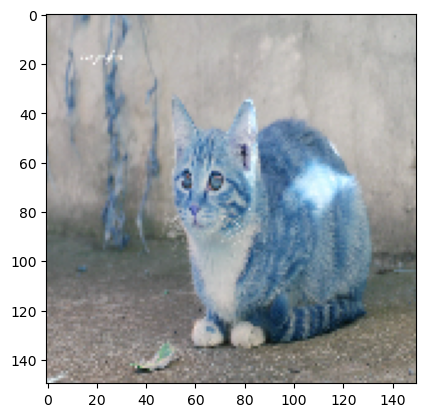

In [91]:
t = plt.imread('./dog_test.jpg')
im_rgb = cv.cvtColor(t, cv.COLOR_BGR2RGB)
im_rgb = cv.resize(im_rgb, (150,150))
im_rgb = im_rgb.reshape(1,150,150,3)

print(np.where(model1.predict(im_rgb) > 0.5, '강아지', '고양이'))

t = plt.imread('./cat_test.jpg')
im_rgb = cv.cvtColor(t, cv.COLOR_BGR2RGB)
im_rgb = cv.resize(im_rgb, (150,150))
im_rgb = im_rgb.reshape(1,150,150,3)

print(np.where(model1.predict(im_rgb) > 0.5, '강아지', '고양이'))
plt.imshow(im_rgb[0])
print(model1.predict(im_rgb))

In [92]:
from keras.models import load_model, save_model

model1.save('dog_or_cat.h6')

INFO:tensorflow:Assets written to: dog_or_cat.h6/assets


INFO:tensorflow:Assets written to: dog_or_cat.h6/assets


In [97]:
layers2 = vgg.layers
layers2.extend(model.layers)

model2 = Sequential(layers2)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.evaluate(X_test, y_test)

13/13 [==============================] - 13s 1s/step - loss: 0.8052 - accuracy: 0.9525


[0.8051797747612, 0.9524999856948853]

In [ ]:
t = plt.imread('./dog_test.jpg')
im_rgb = cv.cvtColor(t, cv.COLOR_BGR2RGB)
im_rgb = cv.resize(im_rgb, (150,150))
im_rgb = im_rgb.reshape(1,150,150,3)
dt = vgg.predict(im_rgb)

print(np.where(model.predict(dt) > 0.5, '강아지', '고양이'))

t = plt.imread('./cat_test1.jpg')
im_rgb = cv.cvtColor(t, cv.COLOR_BGR2RGB)
im_rgb = cv.resize(im_rgb, (150,150))
im_rgb = im_rgb.reshape(1,150,150,3)
dt = vgg.predict(im_rgb)

print(np.where(model.predict(dt) > 0.5, '강아지', '고양이'))
plt.imshow(im_rgb[0])